In [1]:
# Dataset
import pandas as pd
import numpy as np
D = pd.read_csv('C:/Users/kathu/Desktop/datasets/assignment3.csv')
print(D)

    RID          age  income student credit_rating Class: buys_computer
0     1        youth    high      no          fair                   no
1     2        youth    high      no     excellent                   no
2     3  middle_aged    high      no          fair                  yes
3     4       senior  medium      no          fair                  yes
4     5       senior     low     yes          fair                  yes
5     6       senior     low     yes     excellent                   no
6     7  middle_aged     low     yes     excellent                  yes
7     8        youth  medium      no          fair                   no
8     9        youth     low     yes          fair                  yes
9    10       senior  medium     yes          fair                  yes
10   11        youth  medium     yes     excellent                  yes
11   12  middle_aged  medium      no     excellent                  yes
12   13  middle_aged    high     yes          fair              

In [2]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
X = D.values[:, 1:5]
print(X)
y=D.values[:,5]
print(y)

[['youth' 'high' 'no' 'fair']
 ['youth' 'high' 'no' 'excellent']
 ['middle_aged' 'high' 'no' 'fair']
 ['senior' 'medium' 'no' 'fair']
 ['senior' 'low' 'yes' 'fair']
 ['senior' 'low' 'yes' 'excellent']
 ['middle_aged' 'low' 'yes' 'excellent']
 ['youth' 'medium' 'no' 'fair']
 ['youth' 'low' 'yes' 'fair']
 ['senior' 'medium' 'yes' 'fair']
 ['youth' 'medium' 'yes' 'excellent']
 ['middle_aged' 'medium' 'no' 'excellent']
 ['middle_aged' 'high' 'yes' 'fair']
 ['senior' 'medium' 'no' 'excellent']]
['no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no']


In [3]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()


In [4]:
D.columns

Index(['RID', 'age', 'income', 'student', 'credit_rating',
       'Class: buys_computer'],
      dtype='object')

In [5]:
data = D.apply(le.fit_transform)
print(data)

    RID  age  income  student  credit_rating  Class: buys_computer
0     0    2       0        0              1                     0
1     1    2       0        0              0                     0
2     2    0       0        0              1                     1
3     3    1       2        0              1                     1
4     4    1       1        1              1                     1
5     5    1       1        1              0                     0
6     6    0       1        1              0                     1
7     7    2       2        0              1                     0
8     8    2       1        1              1                     1
9     9    1       2        1              1                     1
10   10    2       2        1              0                     1
11   11    0       2        0              0                     1
12   12    0       0        1              1                     1
13   13    1       2        0              0                  

In [6]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
X = data.values[:, 1:5]
print(X)
y=data.values[:,5]
print(y)

[[2 0 0 1]
 [2 0 0 0]
 [0 0 0 1]
 [1 2 0 1]
 [1 1 1 1]
 [1 1 1 0]
 [0 1 1 0]
 [2 2 0 1]
 [2 1 1 1]
 [1 2 1 1]
 [2 2 1 0]
 [0 2 0 0]
 [0 0 1 1]
 [1 2 0 0]]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.500


In [8]:
# trying to reduce overfitting with max_depth
tree1= DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.500


In [9]:
# decreasing max_depth
tree2= DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.900
Accuracy on test set: 0.500


In [10]:
# changing random_state
tree3= DecisionTreeClassifier(max_depth = 3, random_state = 10)
tree3.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree3.score(X_test, y_test)))

Accuracy on training set: 0.900
Accuracy on test set: 0.750


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
tree = DecisionTreeClassifier(random_state=0)
tree3.fit(X_train, y_train)
from sklearn.tree import export_graphviz
export_graphviz(tree3, out_file="tree.dot", class_names=["yes","no"],
               feature_names=["age","income","student","credit_rating"], impurity=True, filled=True)

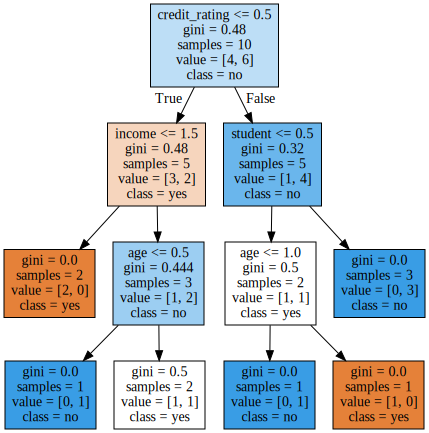

In [12]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)